In [1]:
import pandas as pd

In [2]:
from nsepy import get_history as gh
import datetime as dt

In [5]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("vijayvvenkitesh/microsoft-stock-time-series-analysis")

print("Path to dataset files:", path)


100%|█████████████████████████████████████████████████████████████████████████████| 26.7k/26.7k [00:00<00:00, 1.21MB/s]

Extracting files...
Path to dataset files: C:\Users\User\.cache\kagglehub\datasets\vijayvvenkitesh\microsoft-stock-time-series-analysis\versions\1


In [7]:
import os

print("Dataset path:", path)
print("\nFiles in dataset folder:")
print(os.listdir(path))


Dataset path: C:\Users\User\.cache\kagglehub\datasets\vijayvvenkitesh\microsoft-stock-time-series-analysis\versions\1

Files in dataset folder:
['Microsoft_Stock.csv']


In [10]:
import pandas as pd
import datetime as dt
import kagglehub
import os

# Step 1: Load the dataset
path = kagglehub.dataset_download("vijayvvenkitesh/microsoft-stock-time-series-analysis")
df = pd.read_csv(os.path.join(path, "Microsoft_Stock.csv"))

# Step 2: Convert Date column to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Step 3: Sort and find range
df = df.sort_values('Date')
min_date = df['Date'].min()
max_date = df['Date'].max()

print(f"Dataset available from {min_date.date()} to {max_date.date()}")

#


Dataset available from 2015-04-01 to 2021-03-31


In [13]:
import pandas as pd
import datetime as dt
import kagglehub
import os

# Load the dataset
path = kagglehub.dataset_download("vijayvvenkitesh/microsoft-stock-time-series-analysis")
df = pd.read_csv(os.path.join(path, "Microsoft_Stock.csv"))
df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values('Date')

# Auto-select 150 days around the midpoint
mid_date = df['Date'].min() + (df['Date'].max() - df['Date'].min()) / 2
start = mid_date - pd.Timedelta(days=75)
end = mid_date + pd.Timedelta(days=75)

stk_data = df[(df['Date'] >= start) & (df['Date'] <= end)]
stk_data.set_index('Date', inplace=True)

print(f"Selected 150-day range: {start.date()} → {end.date()}")
print(f"Total rows: {len(stk_data)}")
print(stk_data.head())


Selected 150-day range: 2018-01-16 → 2018-06-15
Total rows: 105
                      Open   High    Low  Close    Volume
Date                                                     
2018-01-16 16:00:00  90.10  90.79  88.01  88.35  36599736
2018-01-17 16:00:00  89.08  90.28  88.75  90.14  25621164
2018-01-18 16:00:00  89.80  90.67  89.66  90.10  24159683
2018-01-19 16:00:00  90.14  90.61  89.66  90.00  36875013
2018-01-22 16:00:00  90.00  91.62  89.74  91.61  23601555


In [14]:
stk_data

,Open,High,Low,Close,Volume
Date,,,,,
2018-01-16 16:00:00,90.10,90.79,88.01,88.35,36599736
2018-01-17 16:00:00,89.08,90.28,88.75,90.14,25621164
2018-01-18 16:00:00,89.80,90.67,89.66,90.10,24159683
2018-01-19 16:00:00,90.14,90.61,89.66,90.00,36875013
2018-01-22 16:00:00,90.00,91.62,89.74,91.61,23601555
...,...,...,...,...,...
2018-06-08 16:00:00,101.09,101.95,100.54,101.63,22165128
2018-06-11 16:00:00,101.37,101.59,100.67,101.05,23490894
2018-06-12 16:00:00,101.10,101.45,100.75,101.31,18325228


In [15]:
column="Close"

In [16]:
stk_data=stk_data[["Open","High","Low","Close"]]

In [17]:
stk_data

,Open,High,Low,Close
Date,,,,
2018-01-16 16:00:00,90.10,90.79,88.01,88.35
2018-01-17 16:00:00,89.08,90.28,88.75,90.14
2018-01-18 16:00:00,89.80,90.67,89.66,90.10
2018-01-19 16:00:00,90.14,90.61,89.66,90.00
2018-01-22 16:00:00,90.00,91.62,89.74,91.61
...,...,...,...,...
2018-06-08 16:00:00,101.09,101.95,100.54,101.63
2018-06-11 16:00:00,101.37,101.59,100.67,101.05
2018-06-12 16:00:00,101.10,101.45,100.75,101.31


In [18]:
from sklearn.preprocessing import MinMaxScaler
Ms = MinMaxScaler()
data1= Ms.fit_transform(stk_data[[column]])
print("Len:",data1.shape)

Len: (105, 1)


In [19]:
training_size = round(len(data1 ) * 0.95)
print(training_size)
X_train=data1[:training_size]
X_test=data1[training_size:]
print("X_train length:",X_train.shape)
print("X_test length:",X_test.shape)
y_train=data1[:training_size]
y_test=data1[training_size:]
print("y_train length:",y_train.shape)
print("y_test length:",y_test.shape)


100
X_train length: (100, 1)
X_test length: (5, 1)
y_train length: (100, 1)
y_test length: (5, 1)


In [20]:
import warnings
warnings.filterwarnings("ignore")

In [21]:
from sklearn.metrics import mean_squared_error
trends=['n','t','c','ct']
orders=[(0,0,1),(0,0,2)]
from statsmodels.tsa.arima.model import ARIMA
for td in trends:
        
        #print(td)
        #trendslist.append(td)
    model = ARIMA(X_train, order=(0,0,10),trend=td,)
    model_fit = model.fit()
        # make prediction
    y_pred= model_fit.predict(len(X_train), len(data1)-1)
        #print(y_pred)
    from sklearn.metrics import r2_score
    mse=mean_squared_error(y_test,y_pred,squared=False)
    from stockFunctions import rmsemape
    print("Trend={}".format(td))
    rmsemape(y_test,y_pred)
    print("************")

Trend=n
RMSE-Testset: 0.4741816772979989
maPe-Testset: 0.4550644945877643
************


C:\Anaconda3\envs\aimj\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Trend=t
RMSE-Testset: 0.0334296524655503
maPe-Testset: 0.0346481937885111
************


C:\Anaconda3\envs\aimj\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Trend=c
RMSE-Testset: 0.14205900927673706
maPe-Testset: 0.14552453908419985
************
Trend=ct
RMSE-Testset: 0.035751760990738006
maPe-Testset: 0.03326808585049866
************


C:\Anaconda3\envs\aimj\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [22]:
len(y_pred)

5

In [23]:
#i=1
td="ct"
model = ARIMA(X_train, order=(0,0,30),trend=td)
model_fit = model.fit()
# make prediction
y_pred= model_fit.predict(len(X_train), len(data1)-1)
#print(y_pred)
from sklearn.metrics import r2_score
mse=mean_squared_error(y_test,y_pred,squared=False)
from stockFunctions import rmsemape
print("Trend={}".format(td))
rmsemape(y_test,y_pred)
print("************")

C:\Anaconda3\envs\aimj\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Trend=ct
RMSE-Testset: 0.12302034969562733
maPe-Testset: 0.12670442279918037
************


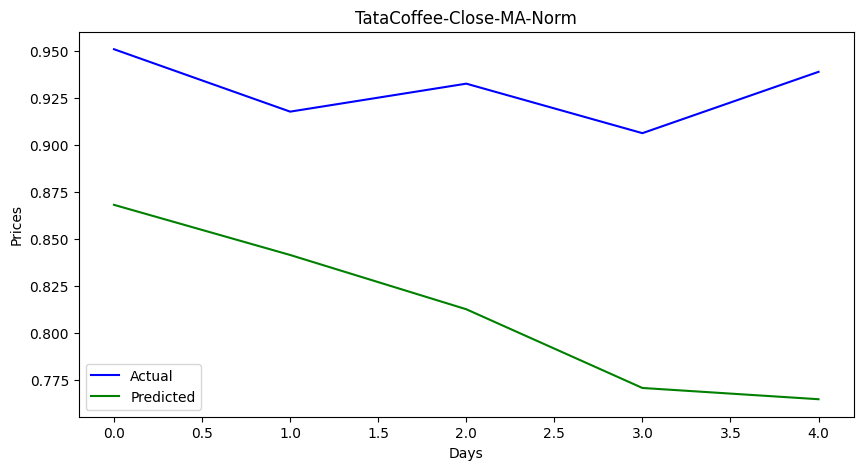

In [24]:
from stockFunctions import graph
graph(y_test,y_pred,"Actual","Predicted","TataCoffee-Close-MA-Norm","Days","Prices")

In [25]:
from stockFunctions import conversionSingle
aTestNormTable=conversionSingle(y_test,[column])
actual_stock_price_test_ori=Ms.inverse_transform(aTestNormTable)
actual_stock_price_test_oriA=conversionSingle(actual_stock_price_test_ori,[column])

In [26]:
from stockFunctions import conversionSingle
pTestNormTable=conversionSingle(y_pred,[column])
predicted_stock_price_test_ori=Ms.inverse_transform(pTestNormTable)
predicted_stock_price_test_oriP=conversionSingle(predicted_stock_price_test_ori,[column])

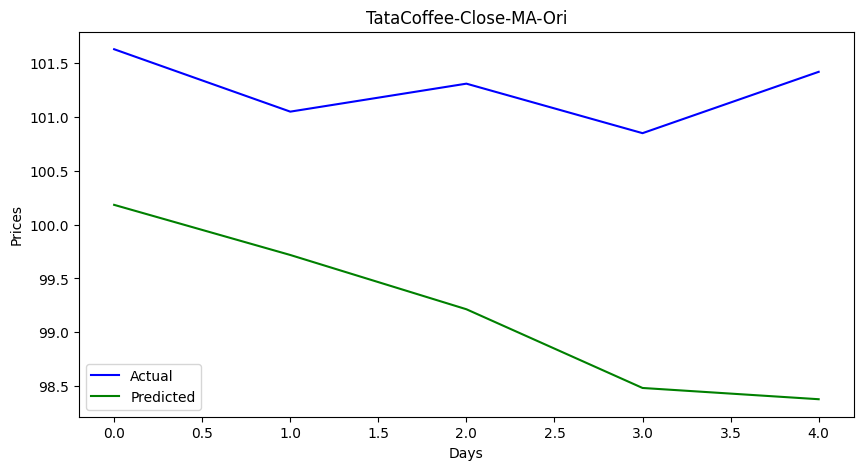

In [27]:
from stockFunctions import graph
graph(actual_stock_price_test_oriA,predicted_stock_price_test_oriP,"Actual","Predicted","TataCoffee-Close-MA-Ori","Days","Prices")

In [28]:
from stockFunctions import rmsemape
rmsemape(actual_stock_price_test_oriA,predicted_stock_price_test_oriP)

RMSE-Testset: 2.15039571267957
maPe-Testset: 0.020315213388972846


In [29]:
forecast=model_fit.predict(len(data1), len(data1)+3)

In [30]:
forecast

array([0.75571966, 0.7388932 , 0.71982187, 0.7016991 ])

In [31]:
from stockFunctions import conversionSingle
fTestNormTable=conversionSingle(forecast,["Closefore"])
forecast_stock_price_test_ori=Ms.inverse_transform(fTestNormTable)
forecast_stock_price_test_oriF=conversionSingle(forecast_stock_price_test_ori,["Closefore"])

In [32]:
forecast_stock_price_test_ori

array([[98.2199796 ],
       [97.92585306],
       [97.5924862 ],
       [97.27570034]])